In [1]:
# Importing TARDIS utility functions
from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data

/home/debjoy/anaconda3/envs/tardis/lib/python3.6/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/debjoy/anaconda3/envs/tardis/lib/python3.6/site-packages/tardis_sn-3.0.dev3414-py3.6-linux-x86_64.egg/tardis/io/util.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Gathering all yml files to be run in parallel differing in time_explosion values
ymls = ['tardis_example.yml', 't_example2.yml', 't_example3.yml']

In [3]:
# the data is automatically downloaded
download_atom_data('kurucz_cd23_chianti_H_He')

[tardis.io.atom_data.atom_web_download][INFO   ]  Downloading atomic data from https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 to /home/debjoy/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (atom_web_download.py:47)


In [4]:
# Measuring time 
import time
start_time = time.time()

In [5]:
# Importing and initialising DASK
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:43369 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 8.25 GB


In [6]:
# Function to return wavelength and luminosity of the spectrums
def generate_params(file):
    print("passing file")
    sim = run_tardis(file)
    spectrum = sim.runner.spectrum
    spectrum_virtual = sim.runner.spectrum_virtual
    spectrum_integrated = sim.runner.spectrum_integrated
    
    # Computing plotting params
    s = [spectrum.wavelength, spectrum.luminosity_density_lambda]
    s_v = [spectrum_virtual.wavelength, spectrum_virtual.luminosity_density_lambda]
    s_i = [spectrum_integrated.wavelength, spectrum_integrated.luminosity_density_lambda]
    
    return s, s_v, s_i

In [7]:
# Plotting Function
%pylab notebook
%matplotlib inline

def plot_graphs(s, s_v, s_i):
    plot(s[0], s[1], label='normal packets')
    plot(s_v[0], s_v[1], label='virtual packets')
    plot(s_i[0], s_i[1], label='formal integral')
    xlabel('Wavelength [$\AA$]')
    ylabel('Luminosity [erg/s/$\AA$]')
    legend()
    show()
    xlim(3000, 9000)

Populating the interactive namespace from numpy and matplotlib


In [8]:
# Calling the function
L = client.map(generate_params, ymls)
L

[<Future: pending, key: generate_params-04cda623b719ef8c07026c24dbfc3e9a>,
 <Future: pending, key: generate_params-26faef277f4efd4ab8cca3005cfaee22>,
 <Future: pending, key: generate_params-2a2a2026a8be1936c07f57020db1c046>]

In [9]:
# Returing all values for the graphs
arr = client.gather(L)

tardis_example.yml


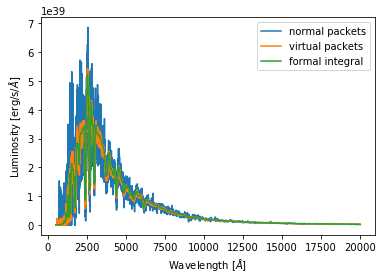

t_example2.yml


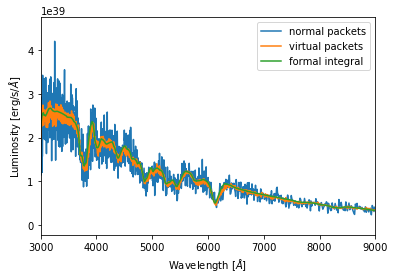

t_example3.yml


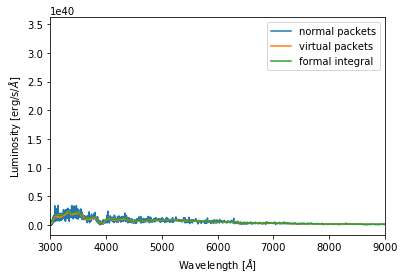

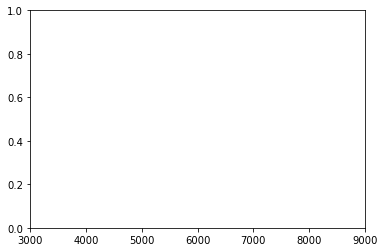

In [10]:
# Calling the plotting function
for i in range(len(ymls)):
    print(ymls[i])
    plot_graphs(arr[i][0], arr[i][1], arr[i][2]) 

In [11]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 107.06291127204895 seconds ---
